<a href="https://colab.research.google.com/github/Tony6512/Kaggle-Datasets/blob/main/Allstate_Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/allstate-claims-severity/sample_submission.csv
/kaggle/input/allstate-claims-severity/train.csv.zip
/kaggle/input/allstate-claims-severity/sample_submission.csv.zip
/kaggle/input/allstate-claims-severity/train.csv
/kaggle/input/allstate-claims-severity/test.csv
/kaggle/input/allstate-claims-severity/test.csv.zip


https://www.kaggle.com/competitions/allstate-claims-severity

# Intro

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import time
import functools

# visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,
BaggingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor)
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

SEED = 0


In [ ]:
df_train = pd.read_csv("/kaggle/input/allstate-claims-severity/train.csv")
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
df_test = pd.read_csv("/kaggle/input/allstate-claims-severity/test.csv")
df_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [ ]:
for i in [df_train, df_test]:
    print(i.shape)

(188318, 132)
(125546, 131)


In [ ]:
df_train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [ ]:
cts_features = df_train.drop(['id', 'loss'], axis = 1).describe().columns
cts_features

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

In [ ]:
df_train.describe(exclude = [np.number])  ## non numeric

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,...,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,...,20,11,84,131,16,51,61,19,23,326
top,A,A,A,A,A,A,A,A,A,A,...,F,B,BI,CL,A,E,BM,A,K,HK
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,...,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061


In [ ]:
cat_features = df_train.describe(exclude = [np.number]).columns
cat_features

Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       'cat10',
       ...
       'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113',
       'cat114', 'cat115', 'cat116'],
      dtype='object', length=116)

In [ ]:
# df_all = concat_df(df_train, df_test)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
# df_all.name = 'All Set'
id_test = df_test['id'] ## for submission
dfs = [df_train, df_test]

print(f'Training X Shape = {df_train.shape}')
print(f'Training y Shape = {df_train.shape[0]}')
print(f'Test X Shape = {df_test.shape}')
print(f'Test y Shape = {df_test.shape[0]}')
print(df_train.columns)
print(df_test.columns)

Training X Shape = (188318, 132)
Training y Shape = 188318
Test X Shape = (125546, 131)
Test y Shape = 125546
Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)
Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
       'cont12', 'cont13', 'cont14'],
      dtype='object', length=131)


In [ ]:
for df in dfs:
    df.info()
    print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB
--------------------------------------------------


In [ ]:
def display_missing(df):
    # for col in df.columns.tolist():
    #   print(f'{col} column missing values: {df[col].isnull().sum()}')
    # print('\n')
    no_missing_data = True
    for col in df.columns.tolist():
      if df[col].isnull().sum() != 0:
        print(f'{col} column missing values: {df[col].isnull().sum()}')
        no_missing_data = False
    if no_missing_data:
      print('There is no missing data in this dataframe or set.')
    print('\n') ## space btw dataframes

In [ ]:
for df in dfs:
    print(f'{df.name}')
    display_missing(df)

Training Set
There is no missing data in this dataframe or set.


Test Set
There is no missing data in this dataframe or set.




There is no missing data.

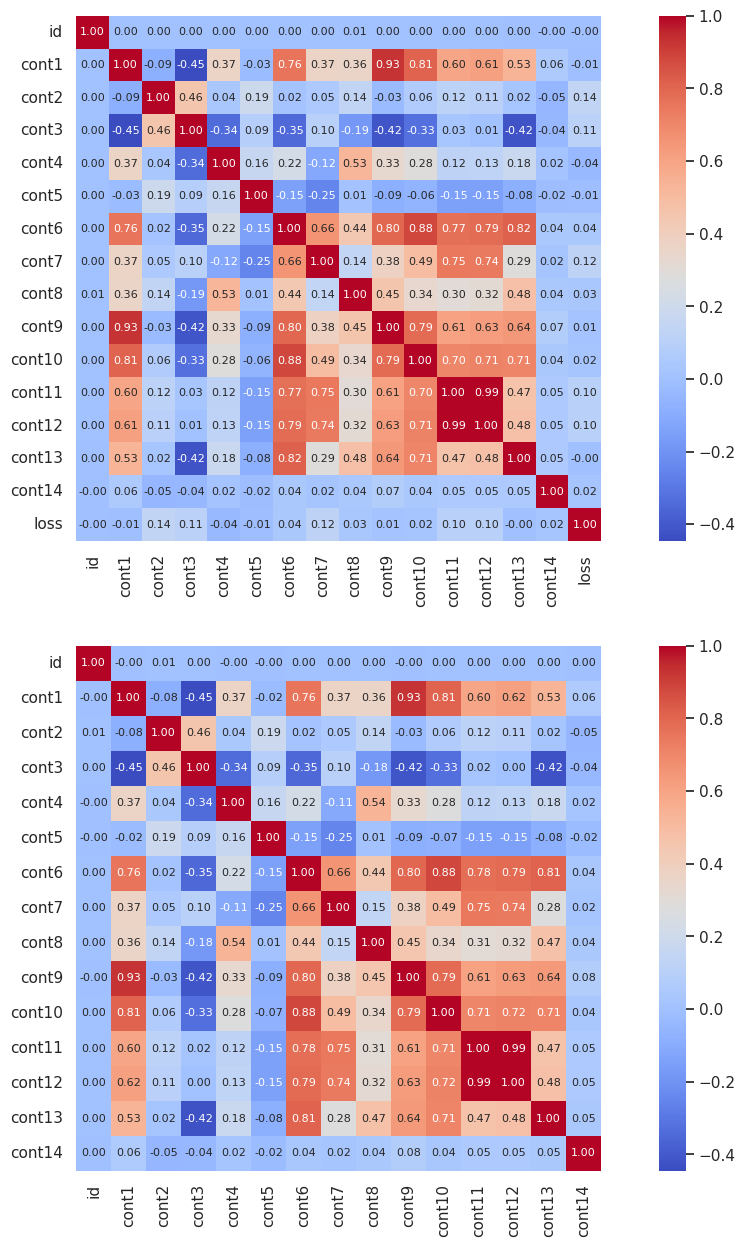

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))

sns.heatmap(df_train.corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 8}, fmt = '.2f')
sns.heatmap(df_test.corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 8}, fmt = '.2f')
plt.show()

Let us look at the target feature.

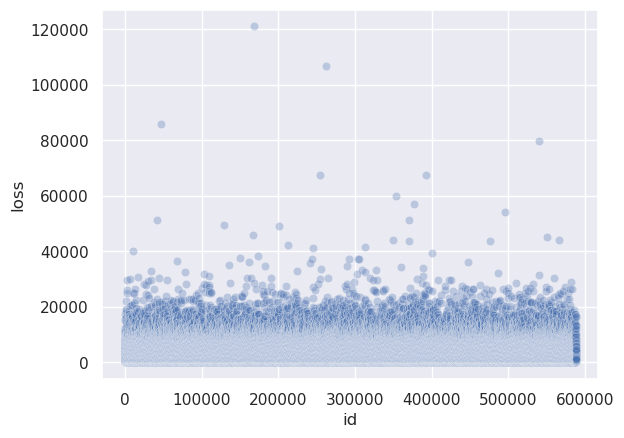

In [ ]:
sns.scatterplot(data=df_train, x= 'id', y = 'loss', alpha = 0.3)
plt.show()

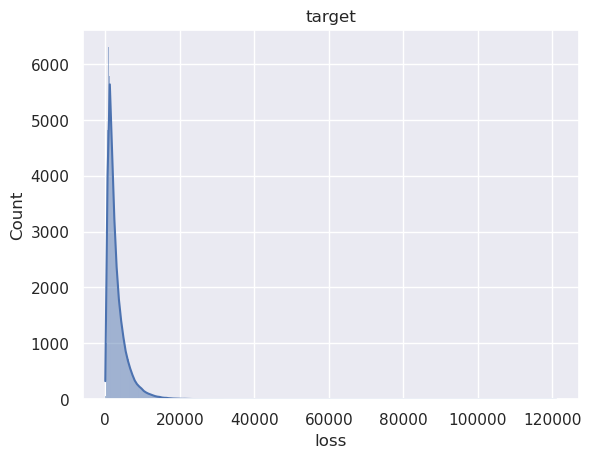

In [ ]:
sns.histplot(data=df_train, x = 'loss', kde = True)
plt.title('target')
plt.show()

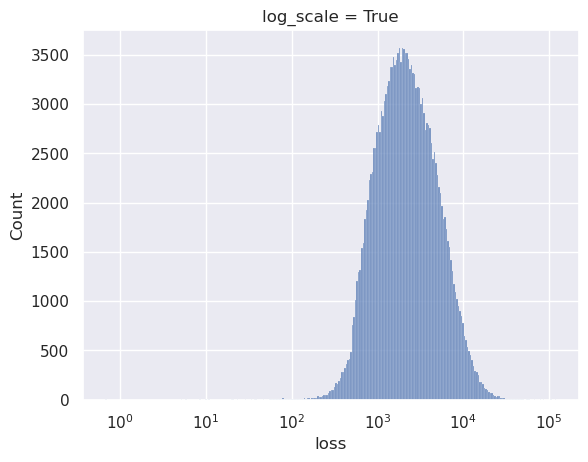

In [ ]:
sns.histplot(data=df_train, x = 'loss', log_scale = True)
plt.title('log_scale = True')
plt.show()

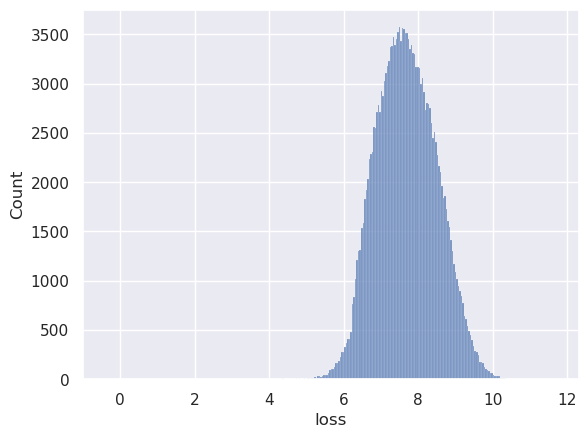

In [ ]:
sns.histplot(np.log(df_train['loss']))
None

We can perform a log transform on the target to make it more symmetric.

We can cherry-pick a few categorical features just to take a look.

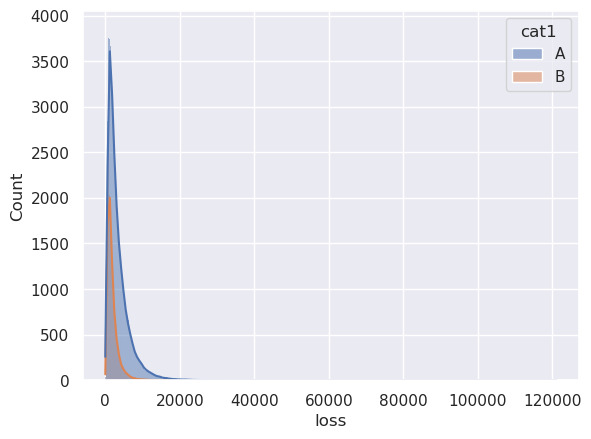

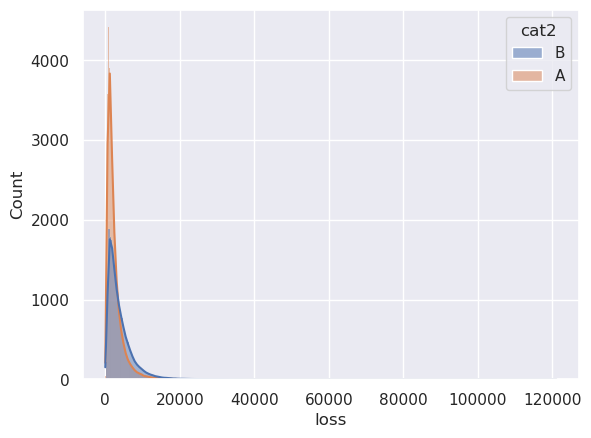

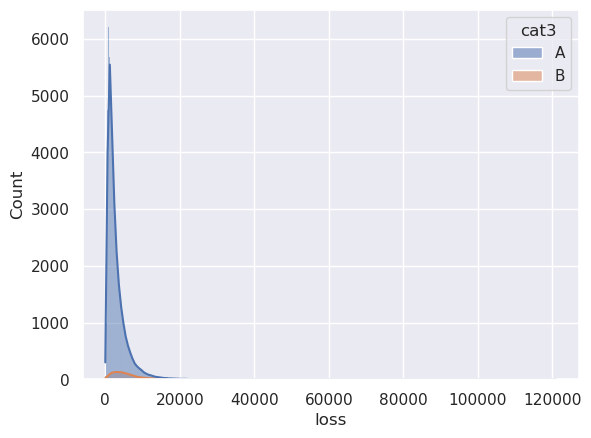

In [ ]:
# cat_features
for feat in ['cat1', 'cat2', 'cat3']:
#     sns.countplot(x= feat, hue='Transported', data=df_train)
    sns.histplot(data=df_train, x= 'loss', hue=feat, kde = True)
#     sns.catplot(data = df_train, x = feat, y = 'loss', alpha = 0.3)
    plt.show()
None

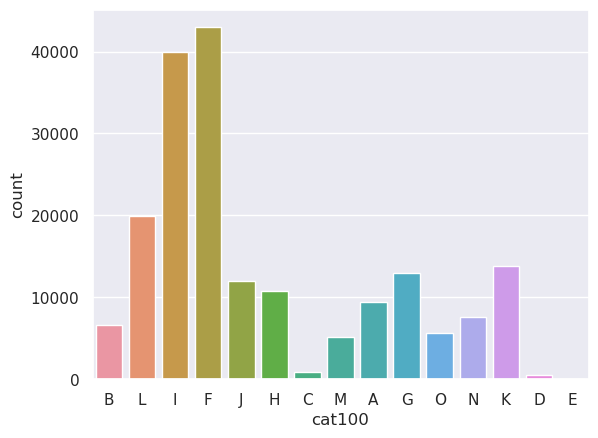

In [ ]:
# sns.catplot(data = df_train, x = 'cat100', y = 'loss', alpha = 0.3)
# sns.histplot(data=df_train, x= 'loss', hue='cat100', kde = True)
sns.countplot(data = df_train, x = 'cat100')
None

# One-hot-encoding

In general, one-hot-encoding is good for categorical data. However, when there are many unique values in the categorical features, the growth of the data set is exponential (each unique value becomes a new binary feature).

In [ ]:
len(cat_features)

116

In [ ]:
# drop_cat = []
# for cat in cat_features:
#     unique_elem, unique_counts = np.unique(df_train[cat], return_counts = True)
#     print(f'{len(unique_elem)} unique elements: {unique_elem, unique_counts}')
#     if len(unique_elem) > 4:
#         drop_cat.append(cat)

In [ ]:
# cat_features_less = cat_features.drop(drop_cat)
# len(cat_features_less)

In [ ]:
# ct = ColumnTransformer(
#     [("scaling", MinMaxScaler(), cts_features),
#      ("onehot", OneHotEncoder(handle_unknown = 'ignore'), cat_features_less)] ## low cardinality of categorical features
# #      ('onehot', OneHotEncoder(handle_unknown = 'ignore', max_categories = 3), cat_features)]  ## high cardinality of categorical features
#         )

In [ ]:
# help(OneHotEncoder()) ### current version does not have keyword argument 'max_categories'

In [ ]:
# X_train = ct.fit_transform(df_train.drop(['loss'], axis = 1))
# y_train = df_train['loss']
# # X_test = df_test

In [ ]:
# ct.get_feature_names_out().shape

In [ ]:
# X_test = ct.transform(df_test)

In [ ]:
# mask_cat = [True if 'cat' in name else False for name in ct.get_feature_names_out()]

In [ ]:
# mask_cat

In [ ]:
# # the scikit-learn implementation does not support categorical variables for now (tree alg)
# # parameters_hgb = {'max_iter':[100, 150, 200]}
# # HGBR_search = GridSearchCV(HistGradientBoostingRegressor(), parameters_hgb, cv = 5).fit(X_train, y_train)
# # HGBR = HGBR_search.best_estimator_
# HGBR = HistGradientBoostingRegressor(loss= 'absolute_error').fit(X_train, y_train)

In [ ]:
# help(HistGradientBoostingRegressor())

In [ ]:
# from sklearn.metrics import mean_absolute_error

In [ ]:
# HGBR.score(X_train,y_train)

In [ ]:
# mean_absolute_error(HGBR.predict(X_train), y_train)

In [ ]:
# perm_impor1 = permutation_importance(estimator = HGBR, X = X_train[:1000], y = y_train[:1000], n_repeats = 5)

In [ ]:
# sorted(perm_impor1.importances_mean, reverse = True)

In [ ]:
# indices = np.argsort(perm_impor1.importances_mean)[::-1]

In [ ]:
# perm_impor1.importances_mean[indices[0:50]]

In [ ]:
# perm_impor1.importances_std

In [ ]:
# plt.barh(ct.get_feature_names_out()[indices[0:20]], perm_impor1.importances_mean[indices[0:20]], xerr = perm_impor1.importances_std[indices[0:20]])
# # plt.xticks(rotation='vertical')
# None

# Native support for categorical features

Some models, such as HistGradientBoosting, have native support for categorical features. So, encoding the categorical features is not necessary.

In [ ]:
cat_high_card = []
for cat in cat_features:
    unique_elem, unique_counts = np.unique(df_train[cat], return_counts = True)
#     print(f'{len(unique_elem)} unique elements: {unique_elem, unique_counts}')
    if len(unique_elem) > 255:
        cat_high_card.append(cat)

In [ ]:
cat_low_card = cat_features.drop(cat_high_card)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ct = ColumnTransformer(
    [("scaling", MinMaxScaler(), cts_features),
     ("ordinal", OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan), cat_low_card)] ## low cardinality of categorical features
#      ('onehot', OneHotEncoder(handle_unknown = 'ignore', max_categories = 3), cat_high_card)]  ## high cardinality of categorical features
        )

In [ ]:
X_train = ct.fit_transform(df_train.drop(['loss', 'id'], axis = 1))
y_train = df_train['loss']
# X_test = df_test

In [ ]:
X_test = ct.transform(df_test.drop(['id'], axis = 1))

In [ ]:
mask_cat = [True if 'cat' in name else False for name in np.concatenate([cts_features, cat_low_card])]

In [ ]:
# mask_cat

In [ ]:
from sklearn.compose import TransformedTargetRegressor

We perform a log transform on the target feature.

In [ ]:
HGBR = HistGradientBoostingRegressor(loss= 'absolute_error', categorical_features = mask_cat,
                                         random_state = SEED).fit(X_train, np.log(y_train))
# HGBR_reg = HistGradientBoostingRegressor(loss= 'absolute_error', categorical_features = mask_cat,
#                                          random_state = SEED)
# HGBR = TransformedTargetRegressor(regressor=HGBR_reg, func=np.log, inverse_func=np.exp).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
HGBR.score(X_train, np.log(y_train))

0.5653662452628765

We invert the target back (using exponetial function) to calculate the MAE.

In [ ]:
mean_absolute_error(np.exp(HGBR.predict(X_train)), y_train)

1125.6758316391715

In [ ]:
-np.mean(HGBR.train_score_)

In [ ]:
-np.mean(HGBR.validation_score_)

In [ ]:
perm_impor1 = permutation_importance(estimator = HGBR, X = X_train[:10000], y = np.log(y_train[:10000]), n_repeats = 5)

In [ ]:
indices = np.argsort(perm_impor1.importances_mean)[::-1]

In [ ]:
perm_impor1.importances_mean[indices[0:50]]

array([0.09762936, 0.06284   , 0.04622685, 0.02812943, 0.02477639,
       0.02235955, 0.02160779, 0.01901824, 0.01660484, 0.01626234,
       0.01562052, 0.01442081, 0.0142009 , 0.01313629, 0.01275129,
       0.00978768, 0.00970433, 0.00756996, 0.0072626 , 0.00565559,
       0.00510438, 0.00488019, 0.00480968, 0.00410749, 0.00387313,
       0.00385874, 0.00340143, 0.00334252, 0.00329897, 0.00266407,
       0.00264332, 0.00239446, 0.00204015, 0.00190363, 0.00169012,
       0.00161817, 0.00136856, 0.00103749, 0.00094593, 0.00083484,
       0.00082557, 0.00080556, 0.00078128, 0.0006211 , 0.00062007,
       0.0006009 , 0.00059219, 0.00049671, 0.00049335, 0.00045981])

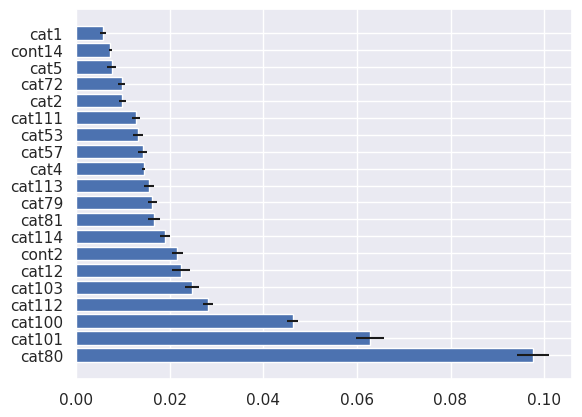

In [ ]:
plt.barh(np.concatenate([cts_features, cat_low_card])[indices[0:20]], perm_impor1.importances_mean[indices[0:20]], xerr = perm_impor1.importances_std[indices[0:20]])
# plt.xticks(rotation='vertical')
None

# Reduced number of features

We can use the permutation importance of the model to eliminate features that have little to no importance based on the viewpoint of the model. We can then retrain the model on the more important features to improve the prediction and speed up the training.

In [ ]:
cts_feat = []
cat_feat = []
for i in np.concatenate([cts_features, cat_low_card])[indices[0:30]]:
    if 'cont' in i:
        cts_feat.append(i)
    else:
        cat_feat.append(i)

In [ ]:
for cat in cat_feat:
    unique_elem, unique_counts = np.unique(df_train[cat], return_counts = True)
#     print(f'{len(unique_elem)} unique elements: {unique_elem, unique_counts}')
    print(f'{len(unique_elem)} unique elements for {cat}')

4 unique elements for cat80
19 unique elements for cat101
15 unique elements for cat100
51 unique elements for cat112
13 unique elements for cat103
2 unique elements for cat12
19 unique elements for cat114
4 unique elements for cat81
4 unique elements for cat79
61 unique elements for cat113
2 unique elements for cat4
2 unique elements for cat57
2 unique elements for cat53
16 unique elements for cat111
2 unique elements for cat2
2 unique elements for cat72
2 unique elements for cat5
2 unique elements for cat1
11 unique elements for cat108
2 unique elements for cat44
2 unique elements for cat6
2 unique elements for cat26
2 unique elements for cat38
4 unique elements for cat82
4 unique elements for cat87
2 unique elements for cat25


In [ ]:
ct = ColumnTransformer(
    [("scaling", MinMaxScaler(), cts_feat),
     ("ordinal", OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan), cat_feat)] ## low cardinality of categorical features
#      ('onehot', OneHotEncoder(handle_unknown = 'ignore', max_categories = 3), cat_high_card)]  ## high cardinality of categorical features
        )

In [ ]:
X_train = ct.fit_transform(df_train.drop(['loss', 'id'], axis = 1))
y_train = df_train['loss']
# X_test = df_test

In [ ]:
X_test = ct.transform(df_test.drop(['id'], axis = 1))

In [ ]:
# mask_cat = [True if 'cat' in name else False for name in np.concatenate([cts_feat, cat_feat])]

In [ ]:
# HGBR = HistGradientBoostingRegressor(loss= 'absolute_error', categorical_features = mask_cat,
#                                         max_iter = 400).fit(X_train, y_train)
# parameters_hgb = {'max_iter':[100, 200, 300, 400, 500, 600]}
# HGBR_search = GridSearchCV(HistGradientBoostingRegressor(loss= 'absolute_error', categorical_features = mask_cat),
#                                parameters_hgb, cv = 5).fit(X_train, y_train)
# HGBR = HGBR_search.best_estimator_

In [ ]:
tic = time.perf_counter()
HGBR = HistGradientBoostingRegressor(loss= 'absolute_error',
                                        max_iter = 400, random_state = SEED).fit(X_train, np.log(y_train))
# HGBR_reg = HistGradientBoostingRegressor(loss= 'absolute_error', max_iter = 400,
#                                          random_state = SEED)
# HGBR = TransformedTargetRegressor(regressor=HGBR_reg, func=np.log, inverse_func=np.exp).fit(X_train, y_train)
toc = time.perf_counter()
print(f'time of computation: {toc - tic: 0.2f} sec')
print(f'time of computation: {(toc - tic)/60: 0.2f} min')

time of computation:  10.51 sec
time of computation:  0.18 min


In [ ]:
HGBR

HistGradientBoostingRegressor(loss='absolute_error', max_iter=400,
                              random_state=0)

In [ ]:
HGBR.score(X_train, np.log(y_train))

0.5615697006116172

In [ ]:
mean_absolute_error(np.exp(HGBR.predict(X_train)), y_train)

1115.9962439182204

In [ ]:
-np.mean(HGBR.train_score_)

0.4255988783710027

In [ ]:
-np.mean(HGBR.validation_score_)

0.43013381192686173

In [ ]:
y_pred_HGBR = np.exp(HGBR.predict(X_test))

In [ ]:
# d_estimator = {'hgbr': HistGradientBoostingRegressor(loss= 'absolute_error', max_iter = 400, random_state = SEED),
#               'etr': ExtraTreesRegressor(n_estimators = 100, criterion = 'absolute_error', random_state = SEED),
#                'ada': AdaBoostRegressor(n_estimators = 100, loss = 'linear', random_state = SEED),
#                'xgb': xgb.XGBRegressor(n_estimators = 100, random_state = SEED)
#               }

In [ ]:
# d_fit = {}
# d_prediction = {'actual': y_train}
# for name, est in d_estimator.items():
# #     print(name, est)
#     tic = time.perf_counter()
# #     d_fit[name] = est.fit(X_train, y_train)
#     d_fit[name] = est.fit(X_train, np.log(y_train))
# #     d_prediction[name] = d_fit[name].predict(X_test)
#     d_prediction[name] = np.exp(d_fit[name].predict(X_test))
#     toc = time.perf_counter()
#     print(f'estimator {name} is fitted')
#     print(f'time of computation: {toc - tic: 0.2f} sec')
#     print(f'time of computation: {(toc - tic)/60: 0.2f} min')

In [ ]:
# df_y = pd.DataFrame(d_prediction)

In [ ]:
# df_y

In [ ]:
# for method in ['pearson', 'spearman', 'kendall']:
#     sns.heatmap(df_y.corr(method = method), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 8}, fmt = '.2f')
#     plt.title(method)
#     plt.show()

In [ ]:
# estimators_stacking = [(name, est) for name, est in d_estimator]

In [ ]:
# stacking_regressor = StackingRegressor(estimators_stacking, final_estimator = None, cv = 5)

In [ ]:
# y_pred_stack = stacking_regressor.predict(X_test)

# Generate Submission

In [ ]:
y_pred = y_pred_HGBR
# y_pred = y_pred_stack

submission_df = pd.DataFrame(columns=['id', 'loss'])
submission_df['id'] = df_test['id'].values
submission_df['loss'] = y_pred
submission_df.to_csv('submissions.csv', header=True, index=False)
print("Your submission was successfully saved!")
submission_df.head(10)

Your submission was successfully saved!


,id,loss
0,4,1431.221654
1,6,1924.369222
2,9,10275.699315
3,12,5699.159777
4,15,796.322358
5,17,2441.208954
6,21,2073.646019
7,28,1064.546715
8,32,2278.502999
9,43,3011.088017


In [ ]:
## this is under 4% off from top score on leaderboard
## private: 1152.88113,1096.92532
## public: 1141.95528, 1109.70772

# End